In [164]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import make_regression

 x0 = 5 n = 0.001
 Xmin = 4.681197927880805 , E'(Xmin) = 10.036825312000474 , i = 20


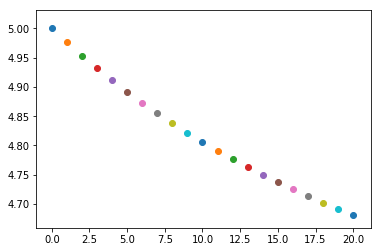

 x0 = 5 n = 0.01
 Xmin = 4.38337502123564 , E'(Xmin) = 1.2637846484449256 , i = 8


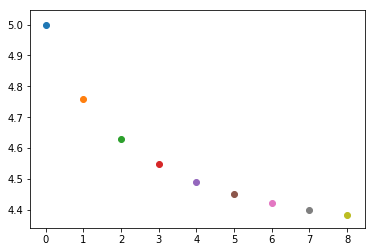

 x0 = 5 n = 0.1
 Xmin = 2.5999999999999996 , E'(Xmin) = -0.5759999999999934 , i = 1


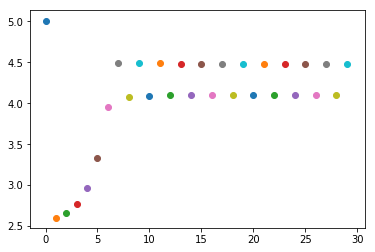

 x0 = 5 n = 0.17
 Xmin = 0.9199999999999999 , E'(Xmin) = -10.376447999999996 , i = 1


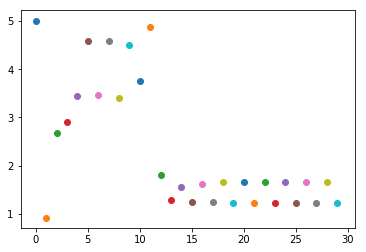

 x0 = 0 n = 0.001
 Xmin = 0 , E'(Xmin) = -61 , i = 0


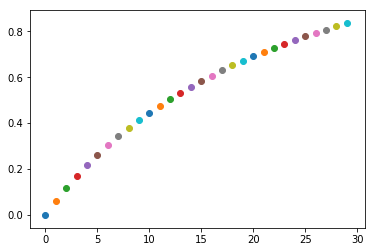

In [67]:
# Descente de gradient

def E(x):
    res = (x-1)*(x-2)*(x-3)*(x-5)
    return res

def deriv_E(x):
    res = 4*x**3 - 33*x**2 + 82*x - 61
    return res


# L'énoncé nous propose de définir max=1000. Néanmoins, dans les exemples ci-dessous,
# l'indice de Xmin ne va jamais au-delà de 20. J'ai donc choisi de mettre max à 30
# pour rendre les graphes ci-dessous plus lisibles, ainsi que pour minimiser le nombre
# de calculs inutiles.

def DG(x0, n, max=30, e=0.01):
    
    print("\033[1m x0 =", x0, "n =", n)
    x_prec = copy.copy(x0)
    x = x0 - n*deriv_E(x0)
    i = 0
    
    # L'énoncé propose comme critère de fin à la DG |Xi+1 - Xi| > e ou i > max.
    # Le problème est que ce critère ne couvre pas le cas où Xi est croissant.
    # J'introduis donc deux variables, xMin et iMin, pour retenir la valeur de x minimale.
    # L'importance de ces variables est visible pour les trois derniers exemples:
        # Pour x0=5, n=0.1 et x0=5, n=0.17 le minimum est trouvé à la première iterration,
        # pour x0=0, n=0.001 x est strictement croissant et donc le minimum est x0 = 0.
    
    xMin = x_prec
    iMin = i
    
    while abs(x-x_prec)>e and i<max:
        
        plt.scatter(i,x_prec)
        if x_prec<xMin:
            xMin = x_prec
            iMin = i
            
        x_prec = x
        x = x - n*deriv_E(x)
        i+=1
        
    print("\033[0m Xmin =", xMin, ", E'(Xmin) =", deriv_E(xMin), ", i =", iMin)
    plt.show()
    #return x


DG(x0=5, n=0.001)
DG(x0=5, n=0.01)

DG(x0=5, n=0.1)
DG(x0=5, n=0.17)

# DG(x0=5, n=1)  
# Avec cet exemple les x obtenus sont tendent tres vite vers (+ ou -) l'infini. 
# Une visualisation s'avère donc être impossible.

DG(x0=0, n=0.001)

In [172]:
# Descente de gradient pour la régression linéaire

def E(a, b, X, Y, N=100):
    res = 0
    for i in range (0, N):
        res += (a*X[i][0] + b - Y[i])**2
    return res


def deriv_a(a, b, X, Y, N=100):
    res = 0
    for i in range (0, N):
        res += Y[i]*X[i][0] - a*X[i][0]**2 - b*X[i][0]
    res = res * (-2)
    return res


def deriv_b(a, b, X, Y, N=100):
    res = 0
    for i in range (0, N):
        res += Y[i] - a*X[i][0] - b
    res = res * (-2)
    return res


def DG_2d(X, Y, n, max=1000):
    a = 1.0;
    b = 1.0;
    
    for i in range (0, max):
        a = a - n*deriv_a(a, b, X, Y)*a
        b = b - n*deriv_b(a, b, X, Y)*b
    
    print("a = ", a, ", b = ", b,  "E(a, b) = ", E(a, b, X, Y),  ", i = ", i)
    
    return (a,b)


a =  19.952066750084274 , b =  0.33004952563968953 E(a, b) =  10.89322012213807 , i =  99
a =  19.951318577089864 , b =  -3.0531133177191805e-16


<function matplotlib.pyplot.show(*args, **kw)>

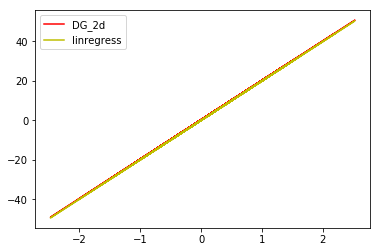

In [184]:
# À cette étape un problème apparaît: le temps d'exécution est beaucoup trop grand lorsque n>0.0001. 
# Les exemples proposés dans l'énoncé ne sont donc pas vraiment exploitables.
# Je fais donc les tests avec n=0.0001.

X, Y = make_regression(100, 1)

a,b = DG_2d(X, Y, 0.0001, 100)
plt.plot(X, a * X + b, 'r', label='DG_2d')

X.resize(100) 
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

print("a = ", slope, ", b = ", intercept)
plt.plot(X, X * slope + intercept, 'y', label='linregress')

plt.legend(loc='upper left')
plt.show

# On remarque que les deux methodes donnent une valeur quasi-identique de a.
# En revanche la valeur de b est plus petite avec la fonction linregress.

# D'apres le graphe les deux methodes ont l'air de donner les memes resultats.